In [4]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sb


In [5]:
datos = pd.read_excel("Clientes.xlsx")

In [6]:
datos.head()

,cedula,oficina,categori,tiempode,monto,saldo,plazo,tasa,cuota,garantia,...,estadoci,sexo,personas,tipovivi,tipocont,aportes,numerocr,antigcoo,default,Cat
0,6754,SANTA FE,E,63,500000.0,411775.0,18,3.1667,36868,P,...,Unión Libre,Masculino,0,NaN,NaN,69000.0,1,6,Malo,E
1,17922,LA 80,E,65,2000000.0,1563604.0,24,3.2083,120761,P,...,Soltero,Masculino,0,NaN,NaN,0.0,1,6,Malo,E
2,167,USAQUEN,E,60,800000.0,658843.0,18,3.1667,58990,P,...,Soltero,Femenino,0,NaN,NaN,82000.0,1,5,Malo,E
3,23093,SANTA FE,E,57,800000.0,744568.0,21,3.2083,52945,P,...,Casado,Masculino,0,Familiar,Término Indefinido,82000.0,1,5,Malo,E
4,16530,USAQUEN,E,58,14153655.0,13567368.0,48,2.8750,547318,R,...,Casado,Masculino,2,Propia,NaN,300000.0,1,7,Malo,E


# Datos Perdidos 

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24786 entries, 0 to 24785
Data columns (total 30 columns):
cedula      24786 non-null int64
oficina     24786 non-null object
categori    24786 non-null object
tiempode    24786 non-null int64
monto       24786 non-null float64
saldo       24786 non-null float64
plazo       24786 non-null int64
tasa        24786 non-null float64
cuota       24786 non-null int64
garantia    24786 non-null object
diasmora    24786 non-null int64
formapag    24786 non-null int64
reestruc    24786 non-null int64
edad        24786 non-null int64
ocupació    24786 non-null object
niveledu    24786 non-null object
ingtot      24786 non-null float64
egrtot      24786 non-null float64
estrato     24786 non-null int64
antigemp    24786 non-null int64
estadoci    24786 non-null object
sexo        24786 non-null object
personas    24786 non-null int64
tipovivi    20414 non-null object
tipocont    19595 non-null object
aportes     24786 non-null float64
numerocr    

In [5]:
nulos = datos.count()/len(datos.index)
nulos

cedula      1.000000
oficina     1.000000
categori    1.000000
tiempode    1.000000
monto       1.000000
saldo       1.000000
plazo       1.000000
tasa        1.000000
cuota       1.000000
garantia    1.000000
diasmora    1.000000
formapag    1.000000
reestruc    1.000000
edad        1.000000
ocupació    1.000000
niveledu    1.000000
ingtot      1.000000
egrtot      1.000000
estrato     1.000000
antigemp    1.000000
estadoci    1.000000
sexo        1.000000
personas    1.000000
tipovivi    0.823610
tipocont    0.790567
aportes     1.000000
numerocr    1.000000
antigcoo    1.000000
default     1.000000
Cat         1.000000
dtype: float64

In [6]:
len(datos.dropna(subset=['tipocont']))

19595

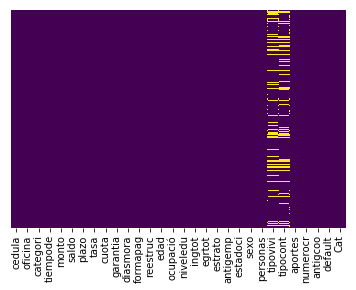

In [7]:
# Mapa de calor para identificar donde faltan datos 

sns.heatmap(datos.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Las lineas amarillas me indican los datos perdidos o nulos

In [8]:
NA_tipovivi = 1-len(datos.dropna(subset=['tipovivi']))/len(datos)
NA_tipovivi

0.1763898975227951

In [9]:
NA_tipocont = 1-len(datos.dropna(subset=['tipocont']))/len(datos)
NA_tipocont

0.20943274429113212

In [10]:
datos.columns

Index(['cedula', 'oficina', 'categori', 'tiempode', 'monto', 'saldo', 'plazo',
       'tasa', 'cuota', 'garantia', 'diasmora', 'formapag', 'reestruc', 'edad',
       'ocupació', 'niveledu', 'ingtot', 'egrtot', 'estrato', 'antigemp',
       'estadoci', 'sexo', 'personas', 'tipovivi', 'tipocont', 'aportes',
       'numerocr', 'antigcoo', 'default', 'Cat'],
      dtype='object')

Solamente el 17.6% de los datos de tipovivi y el 20.9% de los datos tipocont no son nulos, por tanto puedo considerar en quitar estas variables

## Análisis descriptivo

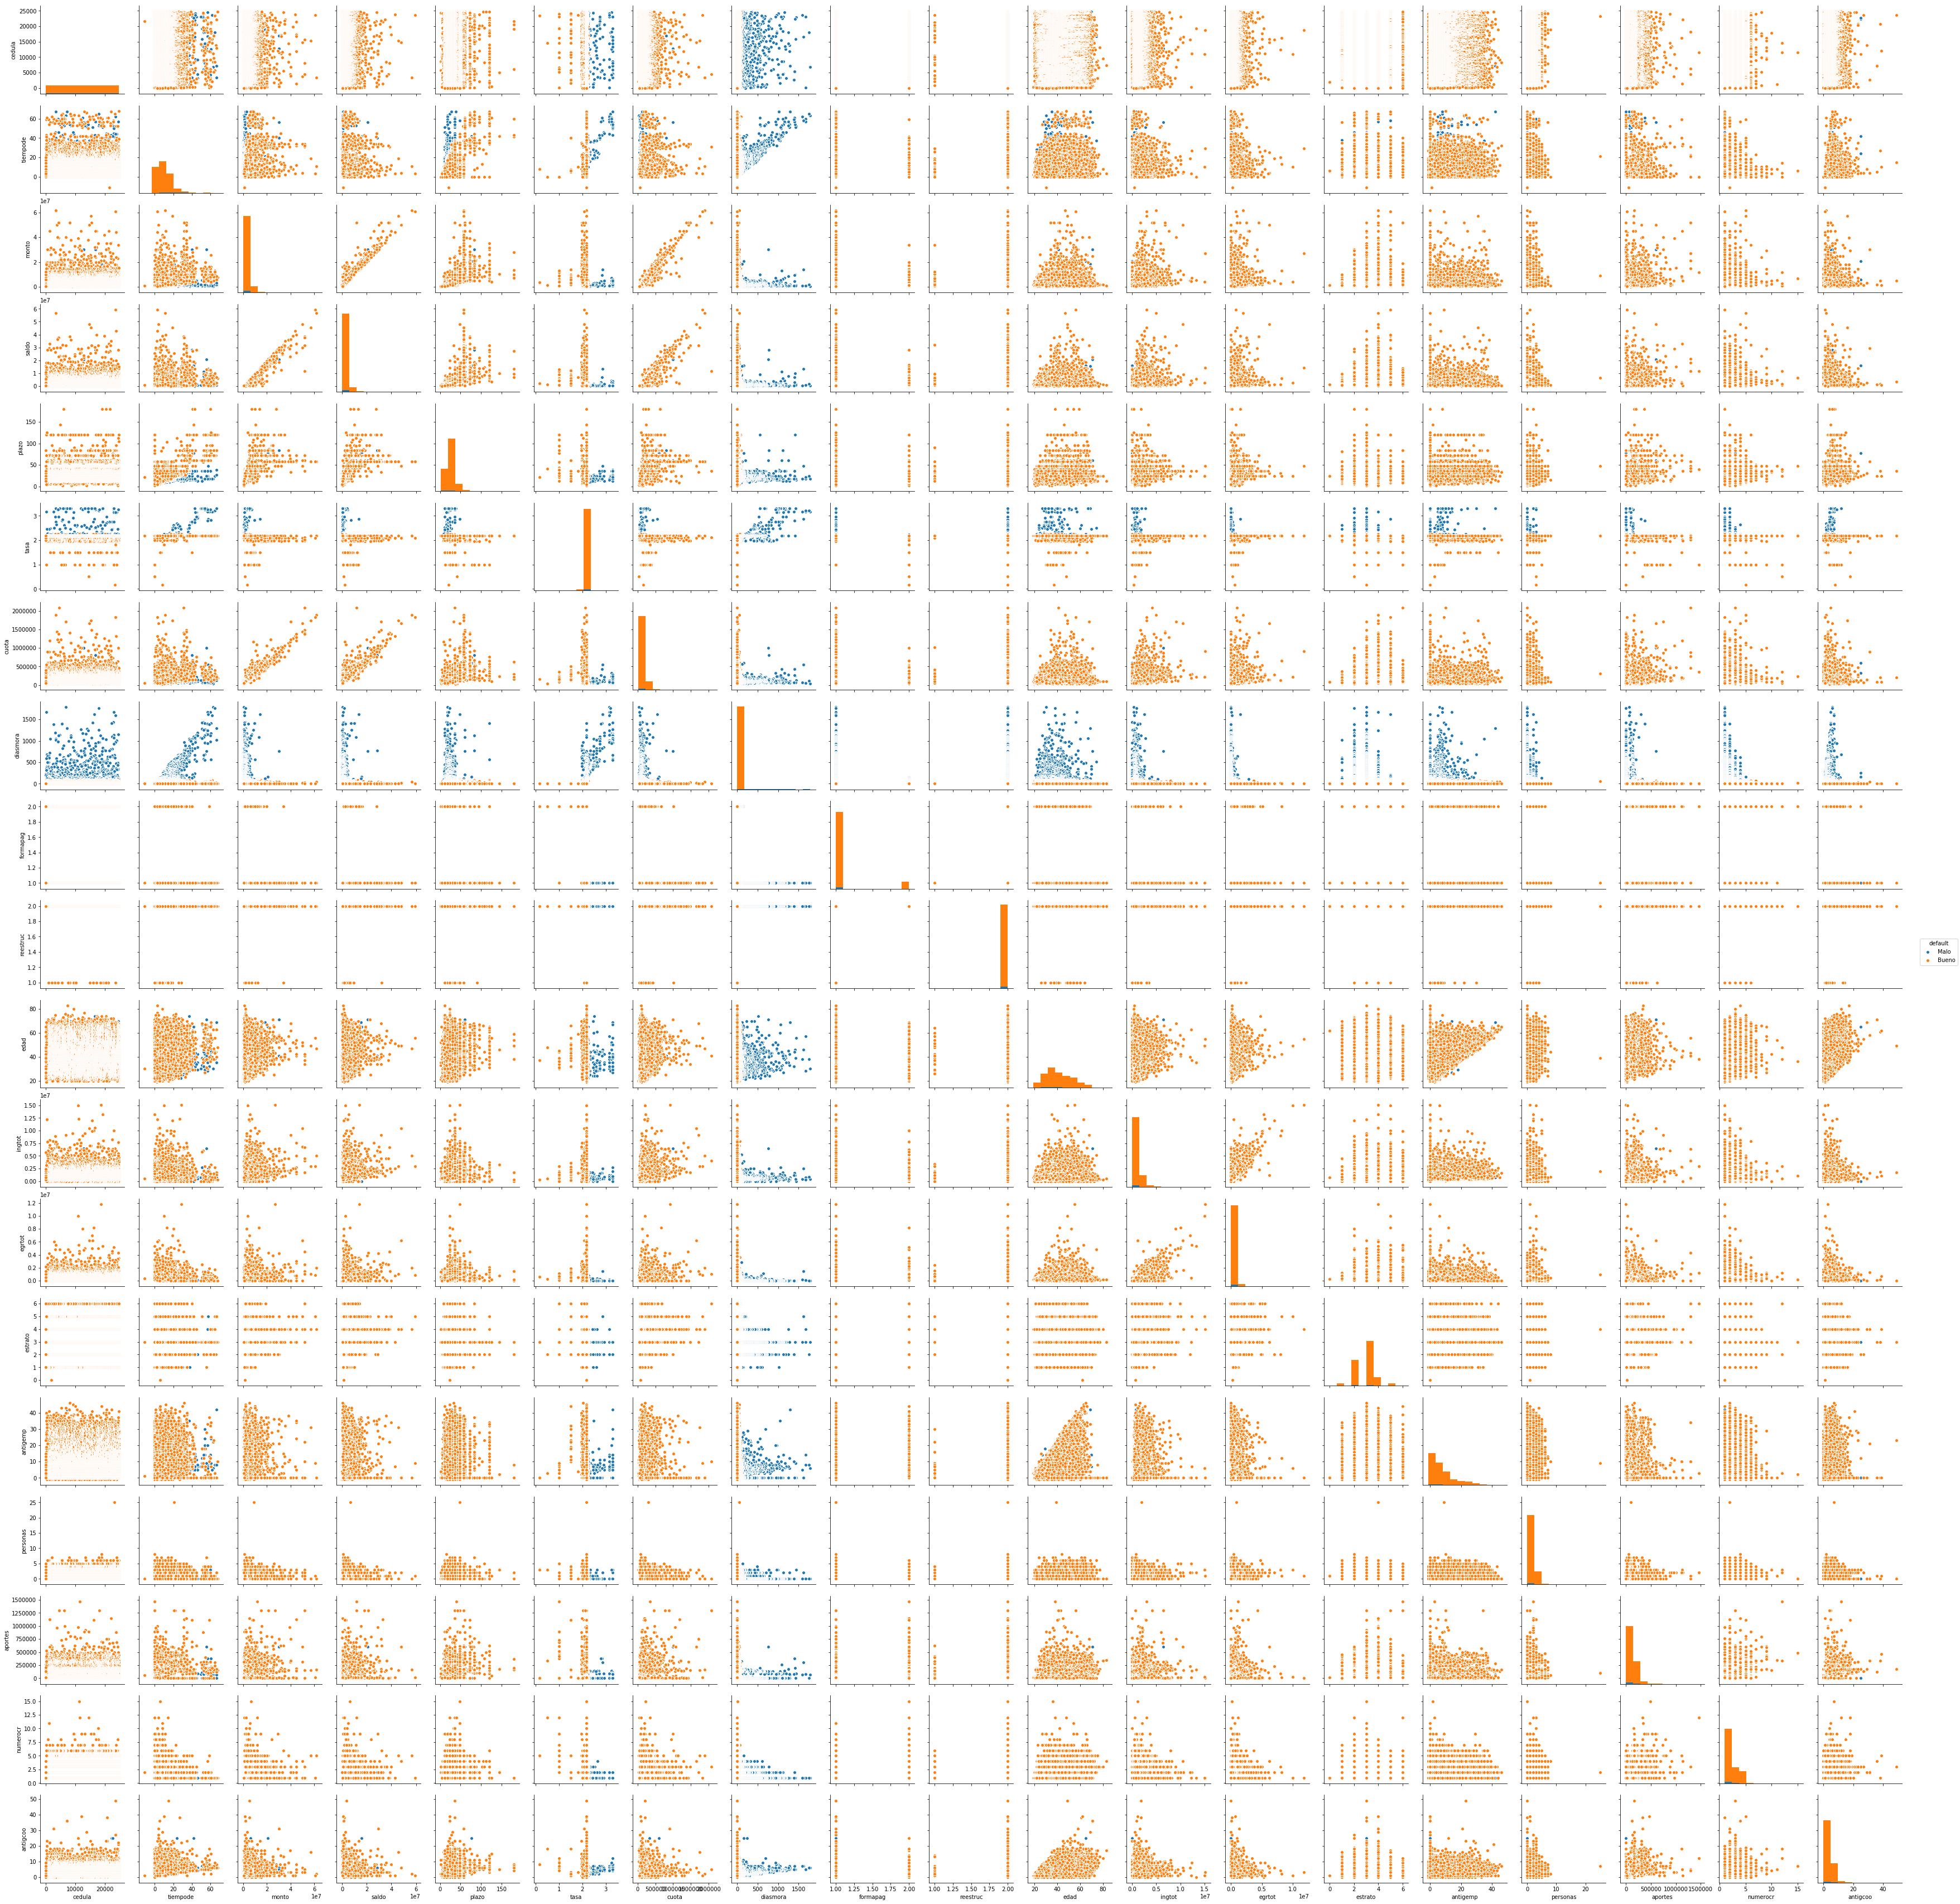

In [11]:
sns.pairplot(data=datos, hue='default', plot_kws=None)

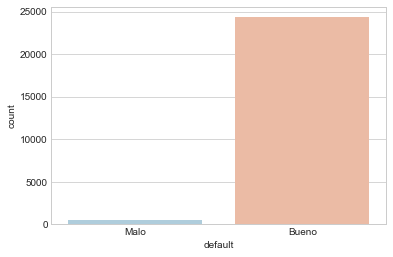

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='default',data=datos, palette='RdBu_r')

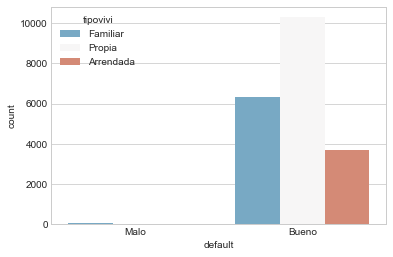

In [13]:
sns.countplot(x='default',hue='tipovivi',data=datos, palette='RdBu_r')

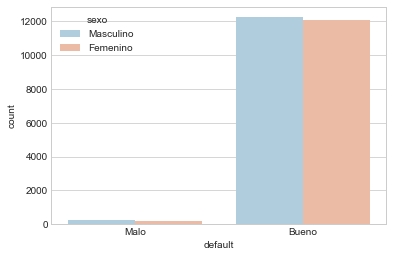

In [14]:
sns.countplot(x='default',hue='sexo',data=datos, palette='RdBu_r')

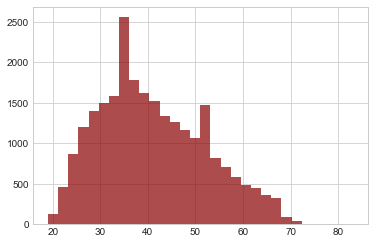

In [15]:
datos['edad'].hist(bins=30,color='darkred',alpha=0.7)

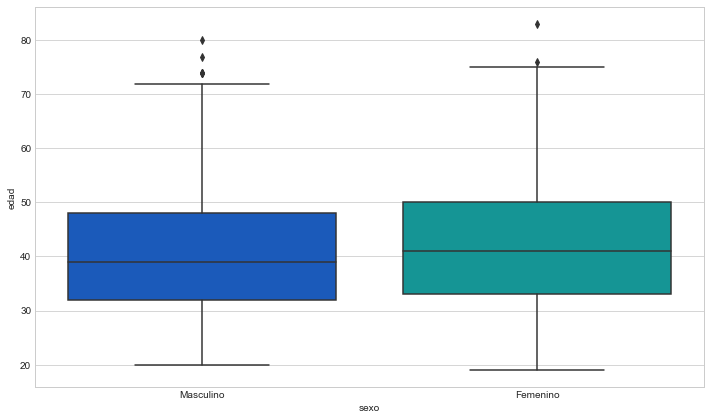

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='sexo', y='edad',data=datos,palette='winter')

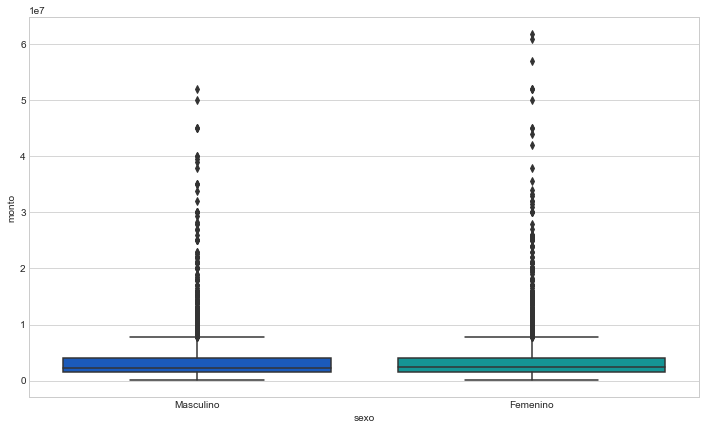

In [17]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='sexo', y='monto',data=datos,palette='winter')

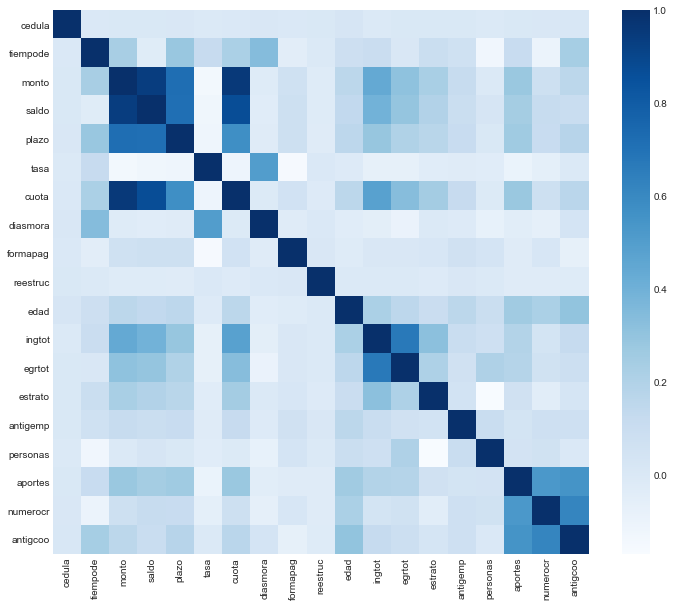

In [18]:
corr = datos.corr()

plt.figure(figsize = (12,10))

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap = 'Blues');


In [19]:
corr

,cedula,tiempode,monto,saldo,plazo,tasa,cuota,diasmora,formapag,reestruc,edad,ingtot,egrtot,estrato,antigemp,personas,aportes,numerocr,antigcoo
cedula,1.000000,0.003063,0.003787,0.005264,0.009407,-0.003959,0.001245,0.008981,0.001096,0.005575,0.026681,-0.002463,0.003659,0.007395,0.007548,-0.005115,0.007529,0.011653,0.016013
tiempode,0.003063,1.000000,0.235246,-0.032490,0.285349,0.117785,0.219135,0.339700,-0.045693,-0.002427,0.082263,0.103648,0.009168,0.095241,0.067715,-0.126784,0.109101,-0.100587,0.236620
monto,0.003787,0.235246,1.000000,0.937122,0.718654,-0.139144,0.954681,-0.021972,0.070255,-0.022289,0.161749,0.441485,0.312036,0.228859,0.116661,-0.002677,0.282140,0.081018,0.163209
saldo,0.005264,-0.032490,0.937122,1.000000,0.714914,-0.120100,0.867832,-0.033243,0.077950,-0.023235,0.140092,0.395482,0.294723,0.196658,0.097611,0.027621,0.245485,0.115109,0.104538
plazo,0.009407,0.285349,0.718654,0.714914,1.000000,-0.118068,0.572668,-0.028595,0.080499,-0.026031,0.156635,0.290819,0.203015,0.171776,0.112299,0.003982,0.259578,0.111259,0.178433
tasa,-0.003959,0.117785,-0.139144,-0.120100,-0.118068,1.000000,-0.109260,0.503644,-0.155274,0.002212,-0.019008,-0.065563,-0.067454,-0.033666,-0.026826,-0.035592,-0.096883,-0.060283,-0.004701
cuota,0.001245,0.219135,0.954681,0.867832,0.572668,-0.109260,1.000000,-0.014810,0.055754,-0.018444,0.161994,0.482376,0.332692,0.249752,0.118120,-0.011728,0.279831,0.078594,0.164650
diasmora,0.008981,0.339700,-0.021972,-0.033243,-0.028595,0.503644,-0.014810,1.000000,-0.025244,0.001298,-0.034339,-0.047809,-0.091464,-0.005578,-0.015712,-0.078090,-0.039084,-0.061878,0.036642
formapag,0.001096,-0.045693,0.070255,0.077950,0.080499,-0.155274,0.055754,-0.025244,1.000000,0.009513,-0.021392,0.010247,0.012418,0.019266,0.066630,0.038414,-0.028612,0.018753,-0.067768
reestruc,0.005575,-0.002427,-0.022289,-0.023235,-0.026031,0.002212,-0.018444,0.001298,0.009513,1.000000,-0.005467,-0.002304,-0.003297,-0.015259,0.011488,-0.005364,-0.027873,-0.026732,-0.023267


In [20]:
datos.drop(['tipovivi', 'cedula', 'tipocont','cuota','plazo','monto','egrtot','numerocr','antigcoo'],axis=1,inplace=True)

De las variables que se encuentran correlacionadas se selecciona una variable

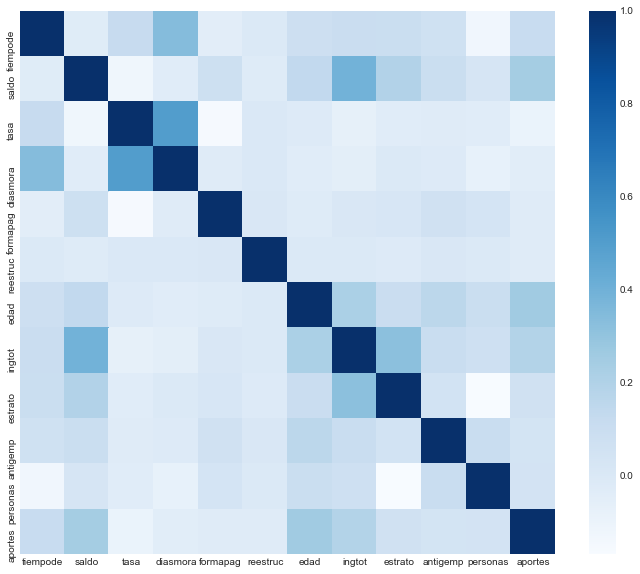

In [21]:
corr = datos.corr()

plt.figure(figsize = (12,10))

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap = 'Blues');

# Conversión de variable categorica



In [22]:
z = pd.Series(datos['sexo'])
z.value_counts()

Masculino    12500
Femenino     12286
Name: sexo, dtype: int64

In [23]:
datos.head()

,oficina,categori,tiempode,saldo,tasa,garantia,diasmora,formapag,reestruc,edad,...,niveledu,ingtot,estrato,antigemp,estadoci,sexo,personas,aportes,default,Cat
0,Itagui,E,63,411775.0,3.1667,P,1784,1,2,30,...,Bachillerato,372315.0,3,6,Unión Libre,Masculino,0,69000.0,Malo,E
1,Laureles,E,65,1563604.0,3.2083,P,1758,1,2,38,...,Bachillerato,900000.0,2,8,Soltero,Masculino,0,0.0,Malo,E
2,Belen,E,60,658843.0,3.1667,P,1677,1,2,57,...,Técnico,800000.0,4,14,Soltero,Femenino,0,82000.0,Malo,E
3,Itagui,E,57,744568.0,3.2083,P,1670,1,2,28,...,Bachillerato,325000.0,3,8,Casado,Masculino,0,82000.0,Malo,E
4,Belen,E,58,13567368.0,2.8750,R,1621,1,2,46,...,Universitario,2500000.0,5,0,Casado,Masculino,2,300000.0,Malo,E


In [24]:
z = pd.Series(datos['estadoci'])
z.value_counts()

Casado          12135
Soltero          7601
Unión Libre      2150
Separado         1701
Viudo            1189
Eclesiástico       10
Name: estadoci, dtype: int64

In [25]:
category_col = datos.columns

for col in category_col:
    b, c = np.unique(datos[col], return_inverse = True)
    datos[col] = c

In [26]:
datos.head()

,oficina,categori,tiempode,saldo,tasa,garantia,diasmora,formapag,reestruc,edad,...,niveledu,ingtot,estrato,antigemp,estadoci,sexo,personas,aportes,default,Cat
0,5,4,61,1340,57,0,401,0,1,11,...,0,198,3,7,4,1,0,170,1,4
1,7,4,63,5669,58,0,400,0,1,19,...,0,3448,2,9,3,1,0,0,1,4
2,0,4,58,2394,57,0,399,0,1,38,...,5,2796,4,15,3,0,0,198,1,4
3,5,4,55,2746,58,0,398,0,1,9,...,0,59,3,9,0,1,0,198,1,4
4,0,4,56,12477,53,1,397,0,1,27,...,6,7343,5,1,0,1,2,595,1,4


In [27]:
z = pd.Series(datos['default'])
z.value_counts()

0    24334
1      452
Name: default, dtype: int64

# Construcción del modelo

La variable predictora es binomial por tanto el modelo que voy a utilizar es una  Regresion logistica 

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = datos.drop('default',axis=1)
y = datos['default']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.30, 
                                                    random_state=101)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)

# Evaluación del modelo

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      7289
          1       0.95      0.95      0.95       147

avg / total       1.00      1.00      1.00      7436



In [35]:
prediction = classifier.predict(X)
np.mean(prediction == y)

0.9986282578875172

In [36]:
classifier.score(X, y)

0.9986282578875172

Se observa los datos se ajustan muy bien al modelo, ya logra predecir con exactitud cuales son los clientes "Buenos" y con 95% los clientes "Malos"

In [37]:
from sklearn.metrics import confusion_matrix

prediction = classifier.predict(X)
cnf_matrix = confusion_matrix(y, prediction)

In [38]:
print(cnf_matrix)

[[24317    17]
 [   17   435]]


In [39]:
z = pd.Series(datos['default'])
z.value_counts()

0    24334
1      452
Name: default, dtype: int64

La matriz de confusión muestra que de 24334 ejemplos de clientes "Buenos" supo clasificar 24317. Mientras que de 452 ejemplos de clientes "Malos", se equivocó en 17.
